# Business Case

## Revenue Optimization Through Data-Driven Pricing Insights

**Statistical Models (Multiple Regression)**

- Applying multiple regression models to:
    - understand the main factors influencing revenue success and
    - to identify optimal pricing ranges for given strategies.

# Goal to showcase
To build a multiple linear regression model that could help the business understand and predict revenue based on:
- pricing (price definition)
- promotions (discount level)
- marketing investment (spend level),
- product type
- seasonal effects
- units sold
- inventory levels


## Step 1: Problem definition
### Business Need
Maximize revenue across product categories and customer segments by aligning pricing and promotional strategies with historical performance drivers.

### Pain Point
Revenue fluctuates across product types, promotional periods, high demand season — but there is no clear understanding of **what drives those changes**.

It is told there is variability in revenue across product lines, yet lack clarity on **which factors are most impactful** and **how to structure pricing or promotional strategies** to consistently maximize revenue.

This could be leading to inconsistent decision-making and missed opportunities for optimization.

### Objective
Use a statistical model to:
1. identify the key variables that most influence revenue performance.
2. predict revenue (based on past trends) given new inputs.

While predictive in it's use, the model assumes that **historical patterns are indicative of future behavior** and is therefore best used as a **decision-support and scenario-simulation tool**.

### Expected Outcome

- **Identify key revenue drivers**
    
    Understand which variables (e.g., discount level, price, category, marketing effort) have the strongest impact on revenue.
    
- **Reveal inefficiencies in pricing and promotions**
    
    Detect where discounts or marketing spend are not translating into revenue uplift for example.

- **Other outcomes given the context of the enterprise:**
    
    - **Support scenario simulation**
        
        Model revenue under different input combinations to test potential pricing or promotional strategies.
        
    - **Enable data-informed decision-making**

        For example creating pricing rules for given combinations of scenario, that would help to maintain revenue levels
        
    - **Provide actionable insights to:** 
        
        - Define optimal discount thresholds
        - Prioritize marketing investments
        - Set consistent and effective pricing rules across segments
        - Guide strategic commercial decisions with evidence-backed analysis

# Step 2: Data Collection

Here it's loaded the dataset of example (fake one created to replicate a business situation). The patterns found are not aligned with a given business nature, but it's goal is to showcase a workflow around a use case.

This dataset has sales transactions, where each row reflects a product sale event (fact) with features that were chosen in advance.
The dataset includes a set of pre-selected features believed to influence revenue —> our target variable.

In regards to features selection in my perspective, it can have a first step on scheduled meetings with stakeholders and learn about the business context deeper. 

Based on that collected knowledge and wisdom, we could further discuss how we see which variables would have relationships towards our revenue (target to be understood).

This process would help to uncover:
- which variables are known already to impact revenue (validate in the process of model creation)

- how pricing, discounts, seasonality, or segmentations typically behave (see if this happends in the data)

- what trade-offs or constraints exist in practice on dealing with data and business (are they aligned?)

After that we go look for data sources where the data would be available and access/import them to python environment, being through datawarehouses, APIs or csvs that can help reach a final data set. 

This would require knowing databases schemas to understand very well how to extract and manipulate info for our current needs. **This step is not directly demonstrated as this relys upon a generated csv to showcase only.**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("business_dataset.csv",encoding="UTF-8")

In [3]:
df.shape

(1080000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080000 entries, 0 to 1079999
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   base_price             1047614 non-null  float64
 1   product_category       993533 non-null   object 
 2   customer_segment       1080000 non-null  object 
 3   is_peak_season         1080000 non-null  int64  
 4   time_on_market_days    1080000 non-null  int64  
 5   units_in_stock         1080000 non-null  int64  
 6   marketing_spend_level  1036789 non-null  float64
 7   units_sold             1080000 non-null  int64  
 8   revenue                1080000 non-null  float64
 9   discount_level         982893 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 82.4+ MB


In [5]:
df.head(4)

,base_price,product_category,customer_segment,is_peak_season,time_on_market_days,units_in_stock,marketing_spend_level,units_sold,revenue,discount_level
0,18.120,Sensor,Distributor,1,45,846,61.81,179,2659.65,NaN
1,67.730,Connectivity,OEM,0,33,2592,50.45,259,15963.28,medium
2,63.050,Microcontroller,OEM,0,41,3385,39.14,244,14768.83,low
3,62.744,Microcontroller,OEM,1,37,2036,30.46,320,20078.08,blank


In [6]:
prod_cat_list= list(df["product_category"].unique())
prod_cat_list

['Sensor', 'Connectivity', 'Microcontroller', 'Energy IC', nan]

## 2.1 Data Cleaning

### 2.1.1 Handling null values

I usually go for the strategy of: <br>
- understanding the features that have the nulls
- see their number and weight on the column
- if threshold of 20% per col is reached for example, I drop the rows; if not could reached, I try to see a fill with average, median or mode values; or other suited value chosen; -> evaluate on EDA impact afterwards;

This decisions are always aligned with the given context of business.

In [7]:
df.isnull().sum().sum()

np.int64(259171)

In [8]:
df.isnull().sum()

base_price               32386
product_category         86467
customer_segment             0
is_peak_season               0
time_on_market_days          0
units_in_stock               0
marketing_spend_level    43211
units_sold                   0
revenue                      0
discount_level           97107
dtype: int64

In [9]:
(df.isnull().mean() * 100).round(2)

base_price               3.00
product_category         8.01
customer_segment         0.00
is_peak_season           0.00
time_on_market_days      0.00
units_in_stock           0.00
marketing_spend_level    4.00
units_sold               0.00
revenue                  0.00
discount_level           8.99
dtype: float64

In [10]:
df = df.dropna(subset=['discount_level','product_category'])

In [11]:
(df.isnull().mean() * 100).round(2)

base_price               3.01
product_category         0.00
customer_segment         0.00
is_peak_season           0.00
time_on_market_days      0.00
units_in_stock           0.00
marketing_spend_level    4.00
units_sold               0.00
revenue                  0.00
discount_level           0.00
dtype: float64

In [12]:
df.describe()

,base_price,is_peak_season,time_on_market_days,units_in_stock,marketing_spend_level,units_sold,revenue
count,876871.000000,904103.000000,904103.000000,904103.000000,867938.000000,904103.000000,904103.000000
mean,71.639860,0.199797,40.002312,2024.777891,50.003673,250.611101,17620.787494
std,33.778287,0.399848,6.325175,999.272132,22.370906,83.530893,11913.938495
min,4.690000,0.000000,13.000000,163.000000,0.110000,5.000000,89.860000
25%,51.640000,0.000000,36.000000,1290.000000,32.620000,185.000000,8085.180000
50%,68.783000,0.000000,40.000000,1808.000000,50.040000,255.000000,15133.620000
75%,96.310000,0.000000,44.000000,2531.000000,67.320000,315.000000,24220.200000
max,210.199000,1.000000,78.000000,5000.000000,99.910000,495.000000,81889.730000


<Axes: >

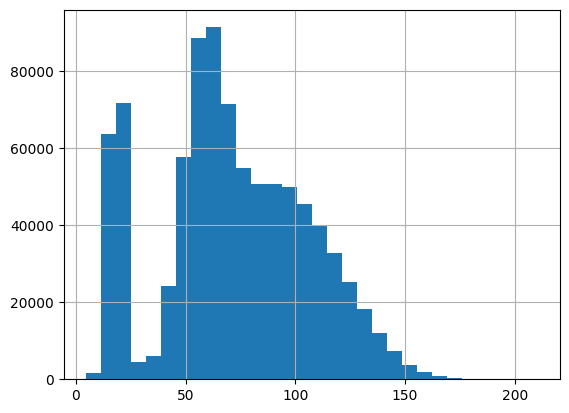

In [13]:
df['base_price'].hist(bins=30)

<Axes: >

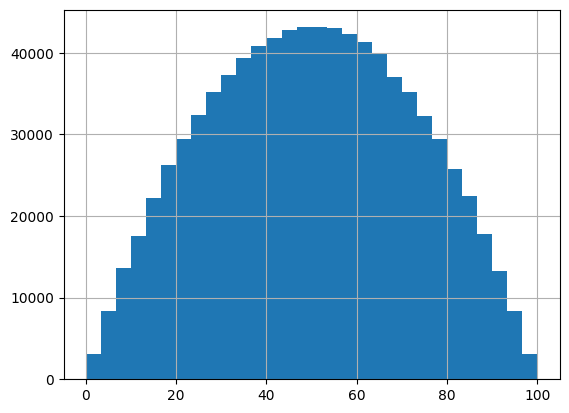

In [14]:
df['marketing_spend_level'].hist(bins=30)
# the same approach will be done for marketing spend level

**Note:** 
- The filling with mean would be ok, since number of cases won't be so affected by this step (we won't distort so much the set of data points). <br>
- Nontheless after testing, a little bit of noise would be added given the output on aftewards EDA. Therefore, I decided to drop also these row nulls on this features

In [15]:
# filling step not executed
#df['base_price'] = df['base_price'].fillna(df['base_price'].mean())
#
#df['marketing_spend_level'] = df['marketing_spend_level'].fillna(df['marketing_spend_level'].mean())

In [16]:
df = df.dropna(subset=['base_price','marketing_spend_level'])

In [17]:
(df.isnull().mean() * 100).round(2)

base_price               0.0
product_category         0.0
customer_segment         0.0
is_peak_season           0.0
time_on_market_days      0.0
units_in_stock           0.0
marketing_spend_level    0.0
units_sold               0.0
revenue                  0.0
discount_level           0.0
dtype: float64

### 2.1.2 Checking for duplicates

In [18]:
df.duplicated().sum()

np.int64(62382)

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

np.int64(0)

Now the dataset is cleaned and we can advanced further for EDA Step and afterwards to the transformations of variables we see fit for better model performance.

# Step: 3 EDA (exploratory data analysis)

After EDA is done, it's possible to decide which variables to include (the ones that can add value to explaining output) and be part of the dataset to feed data to the model afterwards!


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1 Numeric variables analysis

In [22]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()  # selecting only the cols with numeric data type
df[numeric_cols].describe().T # stats about the cols, transposed view

,count,mean,std,min,25%,50%,75%,max
base_price,779416.0,71.659151,33.776742,4.69,51.660,68.805,96.3270,210.199
is_peak_season,779416.0,0.199787,0.399840,0.00,0.000,0.000,0.0000,1.000
time_on_market_days,779416.0,40.000724,6.324897,13.00,36.000,40.000,44.0000,78.000
units_in_stock,779416.0,2024.823286,999.478003,163.00,1290.000,1808.000,2532.0000,5000.000
marketing_spend_level,779416.0,50.005728,22.368059,0.11,32.630,50.030,67.3300,99.910
units_sold,779416.0,250.655835,83.501809,5.00,185.000,255.000,315.0000,495.000
revenue,779416.0,17628.611439,11913.079274,89.86,8096.045,15146.515,24228.1075,81889.730


Plotting visuals can help to understand our distribution in each feature. Therefore ahistogram and also a box plot will help in this matter;

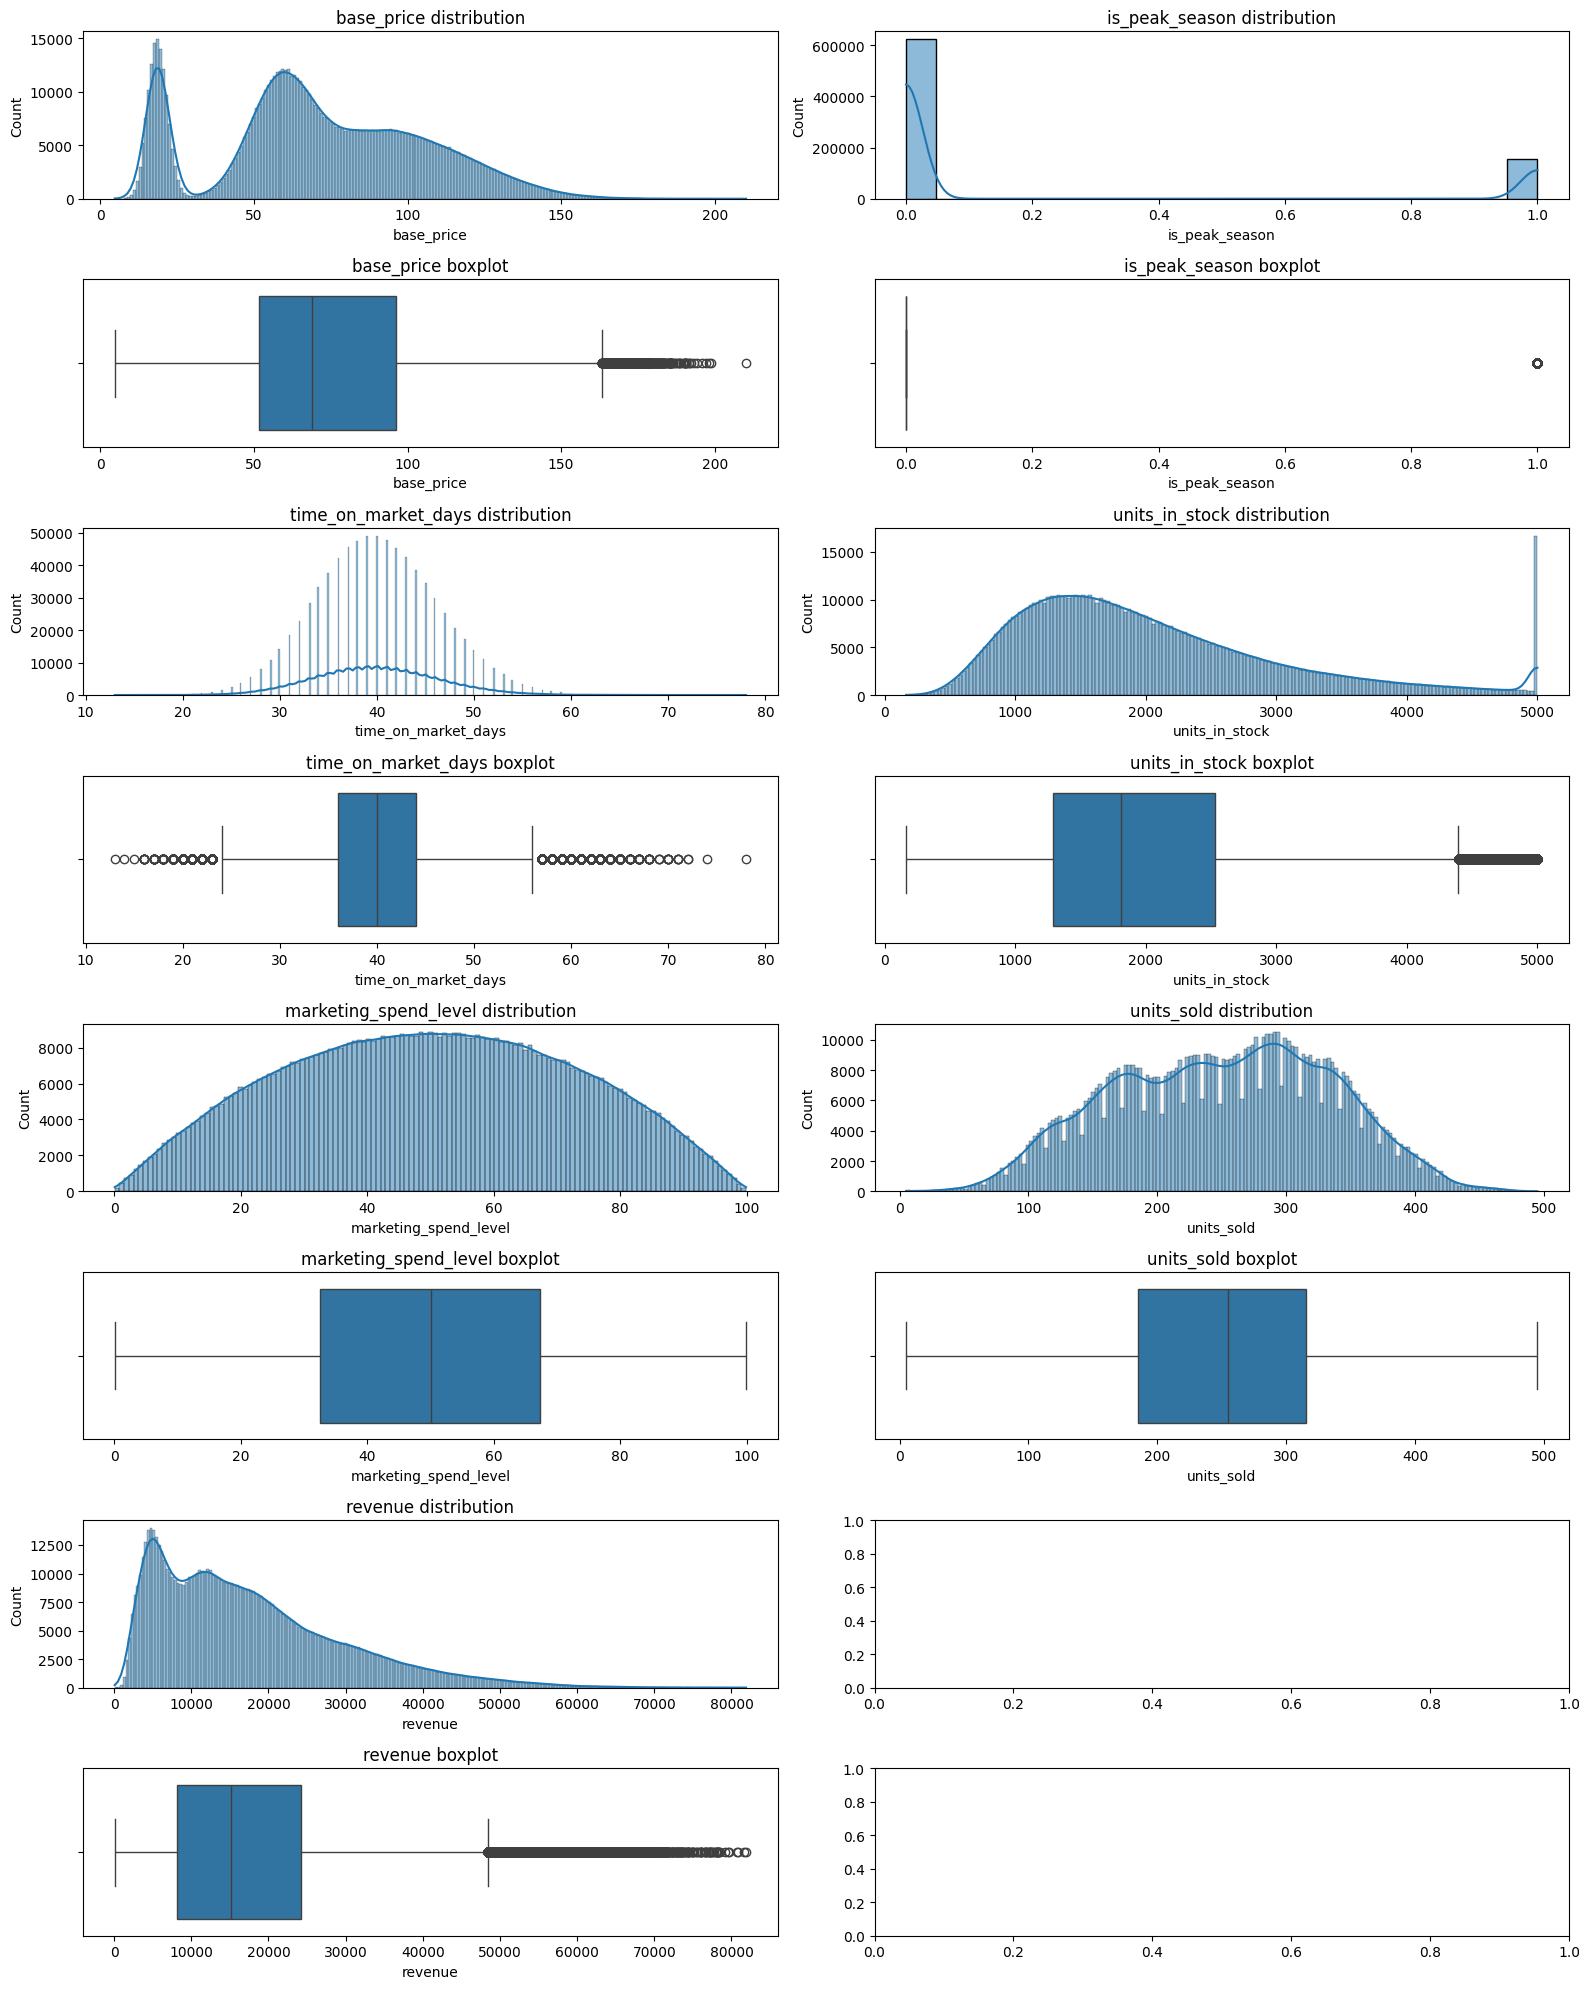

In [23]:
from math import ceil

cols_per_row = 2
num_vars = len(numeric_cols)
rows = ceil(num_vars / cols_per_row) * 2 

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 8, rows * 2.5)) # creating the figure & axes matrix; figsize is about dimensions to give space for charts
axes = axes.flatten()  # to return a 1D array so we iterate over, axes = [0,1,2,3,4,5,6,7] 

for idx, col in enumerate(numeric_cols):
    # to calculate the coordinates
    row_offset = (idx // cols_per_row) * cols_per_row * 2 
    col_offset = idx % cols_per_row # use a sequence where since cols per row is 2, its a even number, so when iterating, position in 0 or 1 col pos

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[row_offset + col_offset])
    axes[row_offset + col_offset].set_title(f"{col} distribution")

    # Boxplot 
    sns.boxplot(x=df[col], ax=axes[row_offset + cols_per_row + col_offset], orient='h')
    axes[row_offset + cols_per_row + col_offset].set_title(f"{col} boxplot")

plt.tight_layout()
plt.show()

#### 3.1.1 Comments on features distribution (example)

##### 3.1.1.1 Base Price
- Base price falls under ranges \$50 til \$100 for 50% of the transaction; with a high relevance also for lower values of price also in the 1Q and more concentrated in interval of 15-20; 
- A positively skewed with outliers could indicate errors or business opportunities that should be explored to replicate for sure...

- If these upper outliers are tied to specific product categories or customer segments, they could guide strategic bundling, upselling, or premium positioning initiatives toused! --> in a business context, a deeper look could unlock insights.


In [24]:
q1 = df['base_price'].quantile(0.25)
median = df['base_price'].quantile(0.50)
q3 = df['base_price'].quantile(0.75)
print(q1)
print(q3)
iqr = q3-q1
print(iqr)

iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker (max non-outlier value):", upper_whisker.round(2))
print("Lower whisker (min non-outlier value):", lower_whisker.round(2))

51.66
96.327
44.667
Upper whisker (max non-outlier value): 163.33
Lower whisker (min non-outlier value): -15.34


In [25]:
q1 = df['revenue'].quantile(0.25).round(2)
q3 = df['revenue'].quantile(0.75).round(2)
print(q1)
print(q3)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker (max non-outlier value):", upper_whisker.round(2))
print("Lower whisker (min non-outlier value):", lower_whisker.round(2))

8096.04
24228.11
Upper whisker (max non-outlier value): 48426.22
Lower whisker (min non-outlier value): -16102.06


##### 3.1.1.2 Removing Outliers in 'units_in_stock'

Since the histogram reveals a noticeable spike at the highest price values — likely outliers — I decided to filter out those cases for illustration purposes only

In [26]:
q1 = df['units_in_stock'].quantile(0.25).round(2)
q3 = df['units_in_stock'].quantile(0.75).round(2)
print(q1)
print(q3)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
print("Upper whisker (max non-outlier value):", upper_whisker.round(2))

1290.0
2532.0
Upper whisker (max non-outlier value): 4395.0


In [27]:
df_model = df[df['units_in_stock'] <= upper_whisker]

### 3.2 Categorical variables analysis

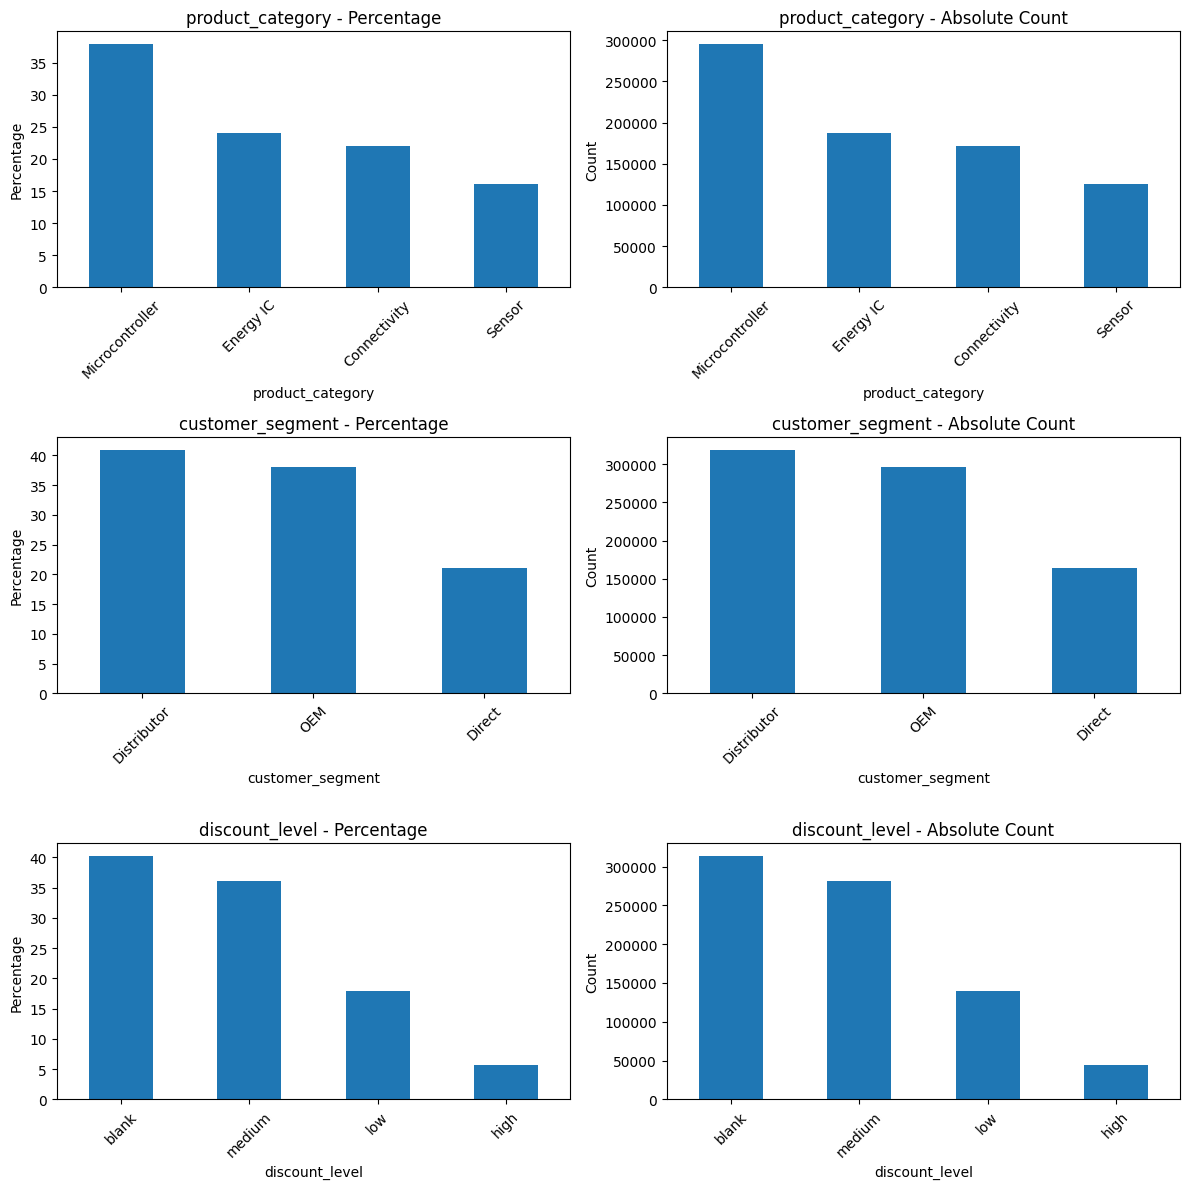

In [28]:
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include='object').columns.tolist()

n_vars = len(categorical_cols)
fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4 * n_vars))  

if n_vars == 1:
    axes = [axes]

for i, col in enumerate(categorical_cols):
    # Absolute counts
    df[col].value_counts().plot(kind='bar', ax=axes[i][1])
    axes[i][1].set_title(f"{col} - Absolute Count")
    axes[i][1].tick_params(axis='x', rotation=45)
    axes[i][1].set_ylabel("Count")

    # Percentages
    (df[col].value_counts(normalize=True) * 100).plot(kind='bar', ax=axes[i][0])
    axes[i][0].set_title(f"{col} - Percentage")
    axes[i][0].tick_params(axis='x', rotation=45)
    axes[i][0].set_ylabel("Percentage")

plt.tight_layout()
plt.show()

Distribution on categories by variables on % and absolute values; could help understand better the business step up for better interpretation of the model to be created.

## 3.3 Bivariate analysis

### 3.3.1 Correlation

Creation of a correlation Matrix can help us identify which variables are correlated between each other and avoid multicollinearity (important for model outcome); 
- plus their relationship of influence on the outcome variable - target revenue;
- also understand if business knowledge previoulsy gather is aligned with data and vice-versa;

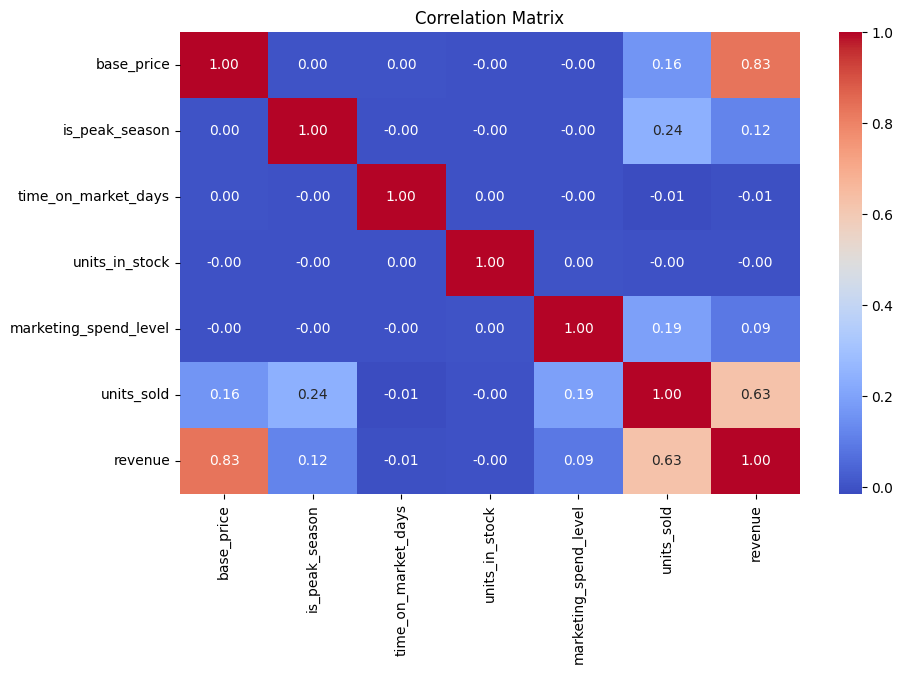

In [29]:
plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

In [30]:
if "revenue" in df.columns:
    print("\nTop correlations with revenue:")
    corr_series = df[numeric_cols].corr()['revenue'].drop("revenue")
    print(corr_series.sort_values(ascending=False))




Top correlations with revenue:
base_price               0.830289
units_sold               0.625758
is_peak_season           0.116791
marketing_spend_level    0.092014
units_in_stock          -0.000390
time_on_market_days     -0.006197
Name: revenue, dtype: float64


### 3.3.2 Revenue vs Numeric Features

**Note:**
- This relationships are just to showcase a routine, they don't actual mean business truth 100%.

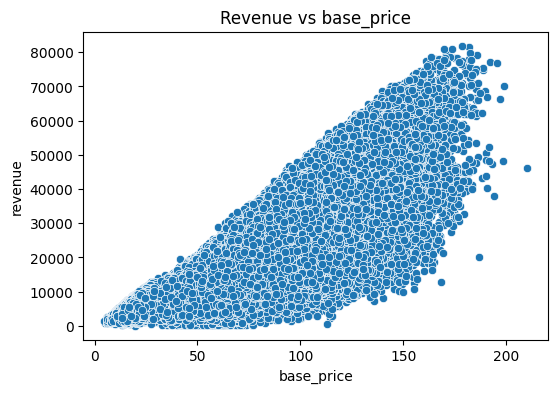

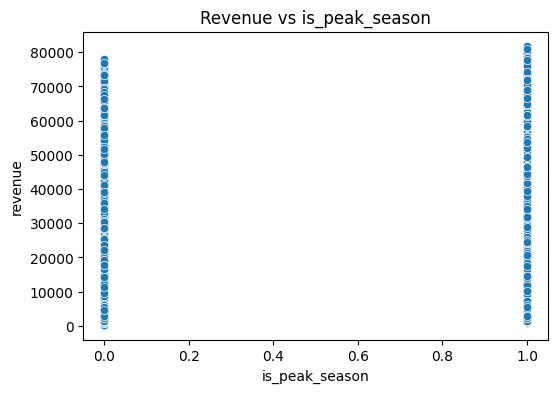

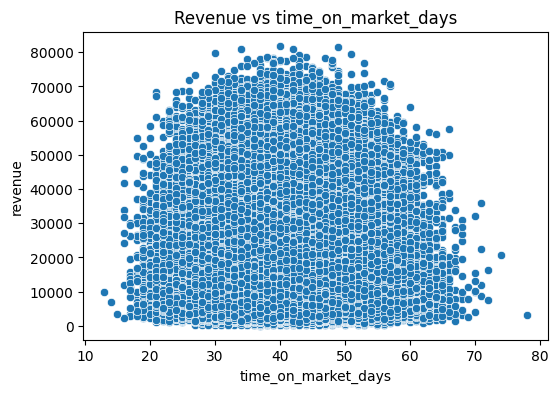

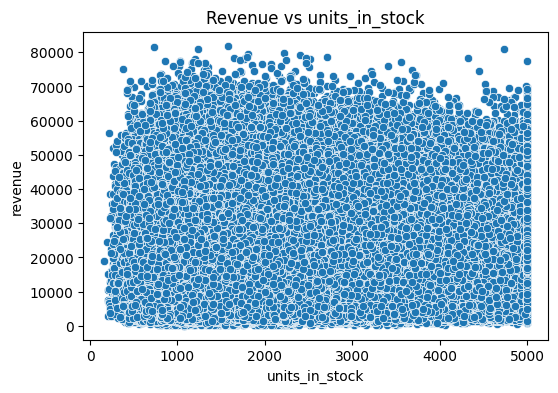

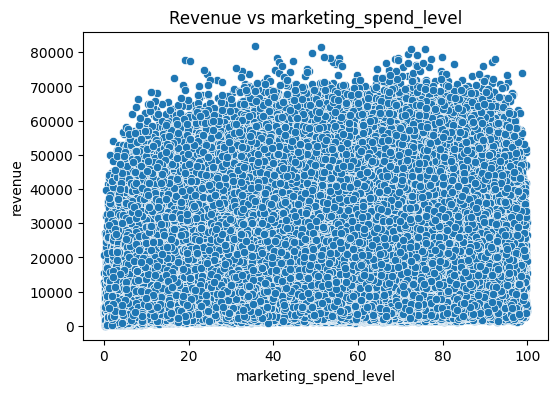

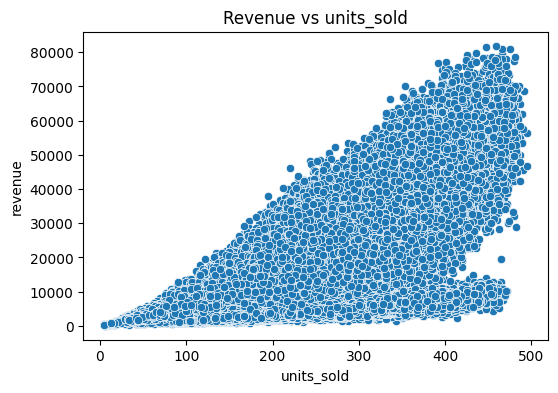

In [31]:
for col in numeric_cols:
    if col != "revenue":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df["revenue"])
        plt.title(f"Revenue vs {col}")
        plt.show()

### 3.3.3 Revenue vs Categorical Features with boxPlots

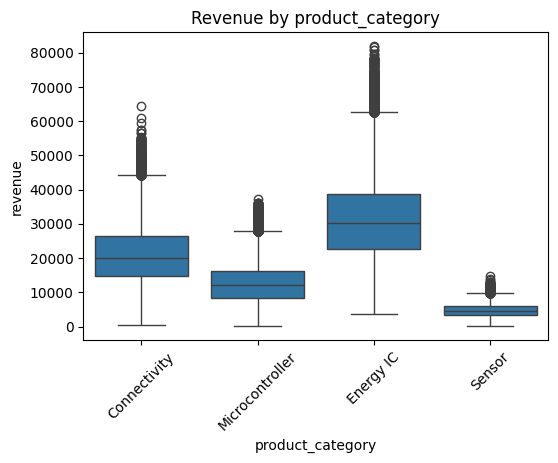

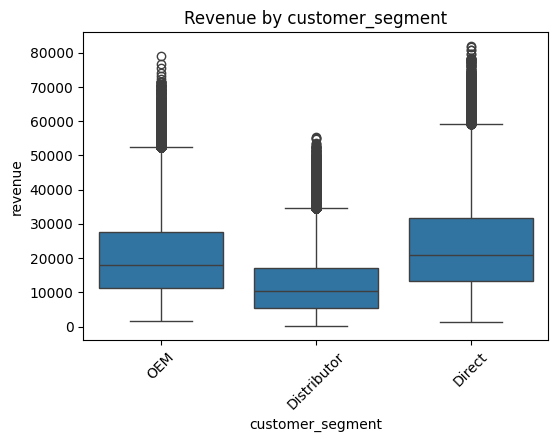

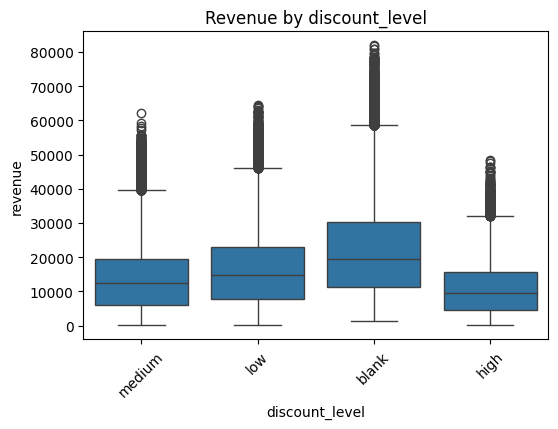

In [32]:
for col in categorical_cols:
    if "revenue" in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=col, y="revenue", data=df)
        plt.title(f"Revenue by {col}")
        plt.xticks(rotation=45)
        plt.show()

## 3.3.4 One-hot encoding for categorical variables

Since models don't understand this variables (text ones), we need to convert them into numerical format! By that we can include the in a linear equation input;

Each category of the variable becomes *a binary column* (1 if it applies, 0 if not)

Allows the model to treat each category independently!

So to levarage, we use them in the model to learn different effects of these categorical, seen as imoprtant previously;

In [33]:
df_encoded = pd.get_dummies(df_model, columns=["customer_segment", "product_category","discount_level"], drop_first=True).astype(int)

- drop_first will allow to avoid multicollinearity, basically when one variable can be reach through other (linear combination), we don't need to use it to avoid redundancy;
- this is at the basis of the linear multiple regression resolution, where the matrix of known data points needs to be invertible and therefore all cols linear independent, so a solution is reached for the system of linear equations to be determined...

In [34]:
df_encoded.head()

,base_price,is_peak_season,time_on_market_days,units_in_stock,marketing_spend_level,units_sold,revenue,customer_segment_Distributor,customer_segment_OEM,product_category_Energy IC,product_category_Microcontroller,product_category_Sensor,discount_level_high,discount_level_low,discount_level_medium
1,67,0,33,2592,50,259,15963,0,1,0,0,0,0,0,1
2,63,0,41,3385,39,244,14768,0,1,0,1,0,0,1,0
3,62,1,37,2036,30,320,20078,0,1,0,1,0,0,0,0
4,97,0,27,3345,37,239,22157,0,1,0,0,0,0,1,0
5,74,0,29,1294,81,321,20917,0,1,1,0,0,0,0,1


# Step 4: Creating the Model

This section is about storing the data in variables of use to be later called on the functions available in Scikit-learn library for the linear multiple regression model creation.

- It's important to validat any high correlation between features, to make decisions on reduction of dimensionalty and removing the right ones if needed.

### 4.1 Model Creation

In [35]:
X = df_encoded.drop(columns=["revenue"])
y = df_encoded["revenue"]

In [36]:
print(X.shape)
print(y.shape)

(750081, 14)
(750081,)


In [37]:
numeric_cols = [ x for x in numeric_cols if x != 'revenue']

corr_matrix = X[numeric_cols].corr()
corr_matrix

,base_price,is_peak_season,time_on_market_days,units_in_stock,marketing_spend_level,units_sold
base_price,1.000000,0.002821,0.001454,-0.000787,-0.000550,0.162868
is_peak_season,0.002821,1.000000,-0.000890,-0.000449,-0.001283,0.238922
time_on_market_days,0.001454,-0.000890,1.000000,-0.000237,-0.000425,-0.014371
units_in_stock,-0.000787,-0.000449,-0.000237,1.000000,0.001834,0.000034
marketing_spend_level,-0.000550,-0.001283,-0.000425,0.001834,1.000000,0.192754
units_sold,0.162868,0.238922,-0.014371,0.000034,0.192754,1.000000


In [38]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # we call only the upper part of the matrix with conditions
upper

,base_price,is_peak_season,time_on_market_days,units_in_stock,marketing_spend_level,units_sold
base_price,NaN,0.002821,0.001454,-0.000787,-0.000550,0.162868
is_peak_season,NaN,NaN,-0.000890,-0.000449,-0.001283,0.238922
time_on_market_days,NaN,NaN,NaN,-0.000237,-0.000425,-0.014371
units_in_stock,NaN,NaN,NaN,NaN,0.001834,0.000034
marketing_spend_level,NaN,NaN,NaN,NaN,NaN,0.192754
units_sold,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)] # condition to drop any above  0.7

if to_drop:
    print(to_drop," These are the ones to drop!")
else:
    print("\nThere are no cols to exclude with high correlation!")


There are no cols to exclude with high correlation!


Since we have no variables **above 0.7** correlation on numeric ones, we can leave them all in the model!

### 4.1.1 Let's move to the workflow

1. Shufle data and split it in a testing set and a test set on a rule of split: X_testning 80% ; X_test 20%
2. Calling the .fit() method from the class to get our linear multiple regression model created
3. Evaluate the model created on it's accuracy through metrics like R2 and explore the others available
4. Test in the test_set also;
5. Explain the business concepts behind the coefficients and completing the outcome of key drivers knowledge;
6. Model can be aftewards used to predict new values given new unknow data, if it passes the evaluation step;

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, root_mean_squared_error

To execute the Train-test split (this function already shuffles the data and split in variables to store 2D and 1D arrays)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Fit the model to our training set (X_train) resultin in the model to be created!

In [42]:
model = LinearRegression()
model.fit(X_train,y_train) # this is the model as instance of linearRegression but now fitted with existing data on X

LinearRegression()

### 4.1.2 Model interpretation

- Displaying the results generated and following to model interpretation

In [43]:
print("Intercept: ", model.intercept_)
print("\nCoefficients: ", model.coef_)
print("\nCoefficients:", dict(zip(X.columns, model.coef_)))

Intercept:  -19408.003294909562

Coefficients:  [ 2.64903638e+02 -1.79203018e+02  8.85136689e-01 -3.30614410e-03
 -2.87646596e+00  7.20575078e+01  6.21900153e+02  1.76594534e+02
  7.73404959e+02  1.17605058e+03  6.41744718e+02 -2.40480559e+03
 -6.26257921e+02 -1.49517802e+03]

Coefficients: {'base_price': np.float64(264.9036375042478), 'is_peak_season': np.float64(-179.20301791119059), 'time_on_market_days': np.float64(0.8851366890830576), 'units_in_stock': np.float64(-0.0033061440986141832), 'marketing_spend_level': np.float64(-2.876465964329275), 'units_sold': np.float64(72.05750777328657), 'customer_segment_Distributor': np.float64(621.900152900277), 'customer_segment_OEM': np.float64(176.59453448614937), 'product_category_Energy IC': np.float64(773.4049590002468), 'product_category_Microcontroller': np.float64(1176.0505815145184), 'product_category_Sensor': np.float64(641.7447176538429), 'discount_level_high': np.float64(-2404.8055908096603), 'discount_level_low': np.float64(-626.2

Display of the largets coefficients that have the most interaction with our target (revenue)

In [44]:
coefs_df = pd.DataFrame( { "feature": X.columns, "coefficient": model.coef_.round(2), "abs_coefficient": np.abs(model.coef_)}
                        )

coefs_df = coefs_df.sort_values(by="abs_coefficient",ascending=False).reset_index()

coefs_df[["feature","coefficient"]]

,feature,coefficient
0,discount_level_high,-2404.81
1,discount_level_medium,-1495.18
2,product_category_Microcontroller,1176.05
3,product_category_Energy IC,773.40
4,product_category_Sensor,641.74
5,discount_level_low,-626.26
6,customer_segment_Distributor,621.90
7,base_price,264.90
8,is_peak_season,-179.20
9,customer_segment_OEM,176.59


The following displays are about the equation to **see it visually**:

In [45]:
equation = f"Revenue = {model.intercept_:.2f}"
for feature, coef in zip(X.columns, model.coef_):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.2f}*{feature}"
print(equation)


Revenue = -19408.00 + 264.90*base_price - 179.20*is_peak_season + 0.89*time_on_market_days - 0.00*units_in_stock - 2.88*marketing_spend_level + 72.06*units_sold + 621.90*customer_segment_Distributor + 176.59*customer_segment_OEM + 773.40*product_category_Energy IC + 1176.05*product_category_Microcontroller + 641.74*product_category_Sensor - 2404.81*discount_level_high - 626.26*discount_level_low - 1495.18*discount_level_medium


In [46]:
from IPython.display import Markdown
import re


def latexify(var_name):  # Format variable names for LaTeX
    return re.sub(r"_", r"\\_", var_name)


equation_lines = [f"Revenue =\\ & {model.intercept_:.2f}"]  # Build lines
for feature, coef in zip(X.columns, model.coef_):
    sign = "+" if coef >= 0 else "-"
    equation_lines.append(f"{sign} {abs(coef):.2f} \\cdot {latexify(feature)}")



latex = r"""
### Linear Multiple Regression Model


\begin{align*}
""" + " \\\\\n& ".join(equation_lines) + r"""
\end{align*}

"""

Markdown(latex) # to render



### Linear Multiple Regression Model


\begin{align*}
Revenue =\ & -19408.00 \\
& + 264.90 \cdot base\_price \\
& - 179.20 \cdot is\_peak\_season \\
& + 0.89 \cdot time\_on\_market\_days \\
& - 0.00 \cdot units\_in\_stock \\
& - 2.88 \cdot marketing\_spend\_level \\
& + 72.06 \cdot units\_sold \\
& + 621.90 \cdot customer\_segment\_Distributor \\
& + 176.59 \cdot customer\_segment\_OEM \\
& + 773.40 \cdot product\_category\_Energy IC \\
& + 1176.05 \cdot product\_category\_Microcontroller \\
& + 641.74 \cdot product\_category\_Sensor \\
& - 2404.81 \cdot discount\_level\_high \\
& - 626.26 \cdot discount\_level\_low \\
& - 1495.18 \cdot discount\_level\_medium
\end{align*}



- For every \$1 we rise on base_price, the impact will be of +\$264.90 on revenue;

- All binary variables are giving, the + ou - direction are towards **the baseline behaviour of the excluded category** (one hot encoding step!)
    - example: all discounts levels **will perfom less** a given amout towards the situation of **no discount applied**.
        - the worst case is the high, to medium and low being less negative to impact revenue;

## Step 5: Model evaluation



Now it's time for performance evaluation!

Since I had beforehand divided our df_enconded in 2 sets (train & test) we can evaluate the fitness to train on metrics like R2, MAE, RMSQ on both outcomes;

- Meaning that we can comapre the y_train_pred vs the real outcome y_train; and to do the same on y_test_pred vs the real outcome y_train we have access;

In [47]:
y_train_pred = model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred)
#MSE_train = mean_squared_error(y_train,y_train_pred)
RMSE_train = root_mean_squared_error(y_train,y_train_pred)

metrics_train = { "R2": r2_train, "Mean Absolute Errror" : MAE_train, "Root Mean Squared Error" : RMSE_train}

# Train metrics
print("TRAIN SET METRICS ")
for name, metric in metrics_train.items():
    print(f"The {name} is {metric:,.2f}!")

print("\n# -----------------------------------------------------------------------------------------------------------------------------------------------------#")

y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test,y_test_pred)
#MSE_test = mean_squared_error(y_test,y_test_pred)
RMSE_test = root_mean_squared_error(y_test,y_test_pred)

metrics_test = { "R2": r2_test, "Mean Absolute Errror" : MAE_test, "Root Mean Squared Error" : RMSE_test}

# Test metrics
print("\nTEST SET METRICS ")
for name, metric in metrics_test.items():
    print(f"The {name} is {metric:,.2f}!")

TRAIN SET METRICS 
The R2 is 0.94!
The Mean Absolute Errror is 2,027.73!
The Root Mean Squared Error is 2,860.01!

# -----------------------------------------------------------------------------------------------------------------------------------------------------#

TEST SET METRICS 
The R2 is 0.94!
The Mean Absolute Errror is 2,034.02!
The Root Mean Squared Error is 2,864.65!


### Metrics interpretation

#### Train Set Metrics

- R2 = 0.94
    - 94% of the variation in revenue can be explained by the features of our model!
    - Could be a situation of overfitting, which could be an issue for future performance on new inputs that are unknown for the model
    - So the generalization ability of the model could be underperforming

- MAE = 2,027.73
    - Average of the absolute differences between actual values and predicted values 
    - in this case on average each prediciton can have a positive or negative offset of \$2,027.73 (regardless of direction)

- RMSQ = 2,860.01
    - Root average of squared differences between actual values and predicted values;
    - it can be a better metric because **it penalizes much more bigger residuals and is the standard deviation of prediction errors**
    - it tell us how far on average the model's prediction are from the actual values, in the same units as the target!
    - So our error of prediction is around \$2,860.01 for a given product category (margin of error in a prediction)


With this **Train and Test metrics so close**, our model is sure to generalize very well , since both performance on different sets its good!



In [48]:
relative_error = (RMSE_train / y.mean()) * 100
print(f"Mean target: ",round(y.mean(),2))
print(f"Relative RMSE: {relative_error:.2f}%")

output = f"The model is able to predict revenue per product transaction with a typical deviation of about ${RMSE_train:.0f}.\n\
Given that the average revenue is around ${y.mean():,.2f}, \
this error corresponds to roughly {relative_error:.2f}% deviation, which could be acceptable for business decisions."
print(output)

# lower than 10% is generally considered excellent for revenue prediction

# mean is used as a baseline sense of scale to compare to the value of the error...

Mean target:  17627.02
Relative RMSE: 16.23%
The model is able to predict revenue per product transaction with a typical deviation of about $2860.
Given that the average revenue is around $17,627.02, this error corresponds to roughly 16.23% deviation, which could be acceptable for business decisions.


# Side Note on 'units_in_stock' feature

Even though ***units_in_stock*** shows 0 correlation with revenue (target variable), I still include it in the model to confirm if it adds any value in context.

And the model confirmed the suspicion by assigning it a near-zero coefficient. This validates my EDA to exclude this one, since it adds no value explaning the outcome. It was included just for the sake of exercise.

The logic:

1. Identified no correlation: 
    - EDA showed **units_in_stock** has no direct relationship with **revenue**
2. Kept it anyway and model gave a zero weight
    - confirmed my initial suspicion that this features adds no value in this context
3. Ready to exclude for simplicity in next iteration;
    - I have justified evidence to remove it!

Outcome: The model assigned it a near-zero coefficient, confirming it has no predictive power in this context.

This shows also how iterative the process of analysis is and therefore a much needed strong routine on scripts is of great help. We can be faster and lose less time to rework and rerun previous work done. This is way I choose Python and Jupyter notebooks as my go tool.

# Step 5: Model-Based Business Recommendations

### Predictions and Use Cases

- Forecast revenue for new product configurations based on selected features
- Simulate revenue scenarios for changing market conditions
- Understand key revenue drivers, as stated before and any inefficiencies in promotional and marketing approaches

## 5.1 Key Revenue Drivers

What variables most afffect revenue (target) and in what direction?



In [49]:
coefs = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_.round(2)
}).sort_values(by="coefficient", ascending=False).reset_index(drop=True)

display(coefs)


,feature,coefficient
0,product_category_Microcontroller,1176.05
1,product_category_Energy IC,773.40
2,product_category_Sensor,641.74
3,customer_segment_Distributor,621.90
4,base_price,264.90
5,customer_segment_OEM,176.59
6,units_sold,72.06
7,time_on_market_days,0.89
8,units_in_stock,-0.00
9,marketing_spend_level,-2.88


Business Takeaway:
- Large positive coefficients are the strongest uplifts on revenue...
- Strong negative coefficients will lead to lower revenues...
- Near-zero → no business impact (the units_in_stock example)

## 5.2 Detect Promotional Inefficiencies

- When are we spending or discounting but not seeing results?? There could be a a way to catch cases based on model prediction vs actual values (facts registered).

- Which segments or product categories show high predicted revenue but poor actual results?



In [50]:
df_encoded["y"] = y
df_encoded["y_pred"] = model.predict(X).round(2) # now im using the full dataset on features, not splitted with the created model, this is a full prediction with both datasets
df_encoded["Residual"] = round(df_encoded["y_pred"] - df_encoded["y"],2)

df_encoded.sort_values(by="Residual", ascending=False).head(10).reset_index()

,index,base_price,is_peak_season,time_on_market_days,units_in_stock,marketing_spend_level,units_sold,revenue,customer_segment_Distributor,customer_segment_OEM,product_category_Energy IC,product_category_Microcontroller,product_category_Sensor,discount_level_high,discount_level_low,discount_level_medium,y,y_pred,Residual
0,1046362,168,0,46,1988,17,90,12869,1,0,1,0,0,0,0,1,12869,31466.35,18597.35
1,950576,186,0,39,1576,25,132,19989,1,0,1,0,0,1,0,0,19989,38323.56,18334.56
2,384153,155,0,39,1340,3,82,10697,1,0,1,0,0,1,0,0,10697,26572.74,15875.74
3,330243,155,0,43,3011,9,96,12663,1,0,1,0,0,0,0,1,12663,28471.93,15808.93
4,809757,150,0,38,2140,4,84,9961,1,0,1,0,0,1,0,0,9961,25385.93,15424.93
5,690453,164,0,37,4050,17,120,16339,1,0,1,0,0,1,0,0,16339,31644.05,15305.05
6,885798,156,0,53,963,12,106,13791,1,0,1,0,0,1,0,0,13791,28554.77,14763.77
7,601510,148,0,28,1066,4,83,10077,1,0,1,0,0,1,0,0,10077,24778.76,14701.76
8,687257,156,0,38,2066,10,117,15546,1,0,1,0,0,0,0,1,15546,30245.86,14699.86
9,557519,159,0,36,1475,6,111,15980,1,0,1,0,0,0,0,1,15980,30619.92,14639.92


based on these underperforming cases (10 rows filtered above) where:
1. actual revenue is significanttly bellow what the model predicted and they consistently involve:
    - Distributor Segment
    - ECI category
    - high or medium discounts
    - often paired with minimal marketing spend ( [ 4, 25] on the scaled used)

2. this could suggest a promotional inefficiency:
    - the model expected decent returns from these conditions **based on historical patterns**, but **real-world performance fell short**

    - Maybe price **sensitivity is overestimated** or that external demand drivers (market competition or saturation) weren't captured well enough...
        - this means that custormers may **not be stimulated by price discounts or the marketing initiatives** in this areas or our price charged fell short;

3. Recommendation: 
    - reassess discount and pricing strategies for Distributors in the Sensor product category

    - **avoid minimal marketing spend when deployin even high discounts in these segments** 
        - this means that when applying discounts we should strive for better marketing spend strategies, to get the most out of initiaves of this

        - when combining a discount (expecting uplift) but don’t back it with marketing visibility, it could fail to perform in certain segments.

        - **take away: discount alone is not enough and low marketing makes it worse**

        - That’s why is a must to tailor promotions to segment responsiveness, even if average effects look positive in the model.

Final note:

Given the patterns found in regression we could also study pricing rules or strategies to avoid losing revenue, based on the what if scenarios.

# Appendix : the model intercept and binary variables

1. Intercept maybe negative but it's an adjustment term so the model fits the data better when all other variables are in place. It anchors the regression line and absorbs average effects not explained by the selected features. Also given the dataset is not real, we may have effects that also contribute to this outcome.


2. What do the segment/category/seasonality coefficients capture, the binary?

    Example:

        0   product_category_Microcontroller	1176.05
        1	product_category_Energy IC	        773.40
        2	product_category_Sensor	            641.74
        3	customer_segment_Distributor	    621.90

    - These coefficients capture the **average marginal** impact of each category compared to the reference level — based on how the data was structured

    - Telling **how each segment or product category deviates from the baseline** (category that was excluded) based on the historical data patterns

    - Example: The micro controller category **generates slightly more revenue on average** <u>compared to connectivity (the baseline)</u>. But this is specific to the dataset structure and scenario, not a general market truth.